In [33]:
import scvelo as scv
import scanpy as sc
palette = {'cDC1':'#C5E524','cDC2':'#38C2E5','DC2pre-hm':'#384C94', 'DC2hm':'#E679C5'}

# Donor 6 all cDCs

Read h5ad files

In [24]:
d6_adata = sc.read_h5ad('Outputs/h5ad/d6.object.cdcs.h5ad')

Recover clustering info that was lost during the conversion

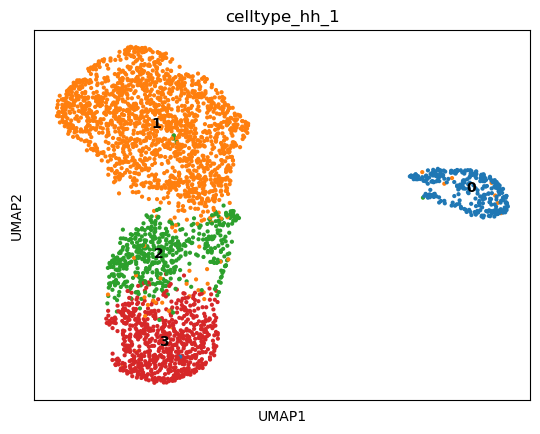

In [25]:
# Convert the cell identities from numeric into category
d6_adata.obs['celltype_hh_1'] = d6_adata.obs['celltype_hh_1'].astype('category')
sc.pl.umap(d6_adata, color='celltype_hh_1', legend_loc='on data')
# Rename numeric category into names
d6_adata.obs['celltype_hh_1'].cat.rename_categories({0:'cDC1',1:'cDC2',2:'DC2pre-hm',3:'DC2hm'},
                                                                                    inplace=True)

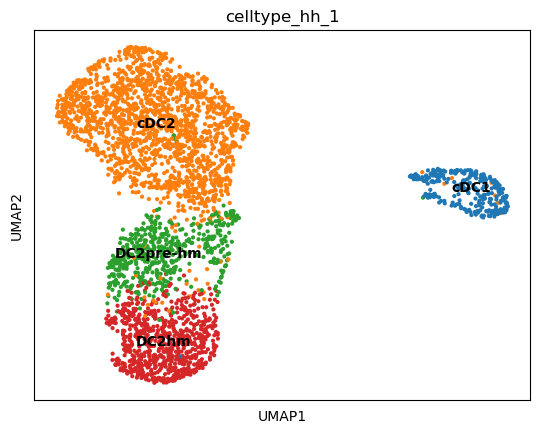

In [26]:
# Check the results
sc.pl.umap(d6_adata, color='celltype_hh_1', legend_loc='on data')

Computing and embedding velocities of all cDCs

In [30]:
# Read velocyto outputs and integrate into adata
d6_ldata = scv.read_loom('Velocyto_outputs/Dnr6.loom')
d6_adata = scv.utils.merge(d6_adata, d6_ldata)

Filtered out 39 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 10/20 cores)


  0%|          | 0/571 [00:00<?, ?gene/s]

    finished (0:00:44) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 10/20 cores)


  0%|          | 0/3289 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file Outputs/figures/Dnr6_velocity_stream.svg


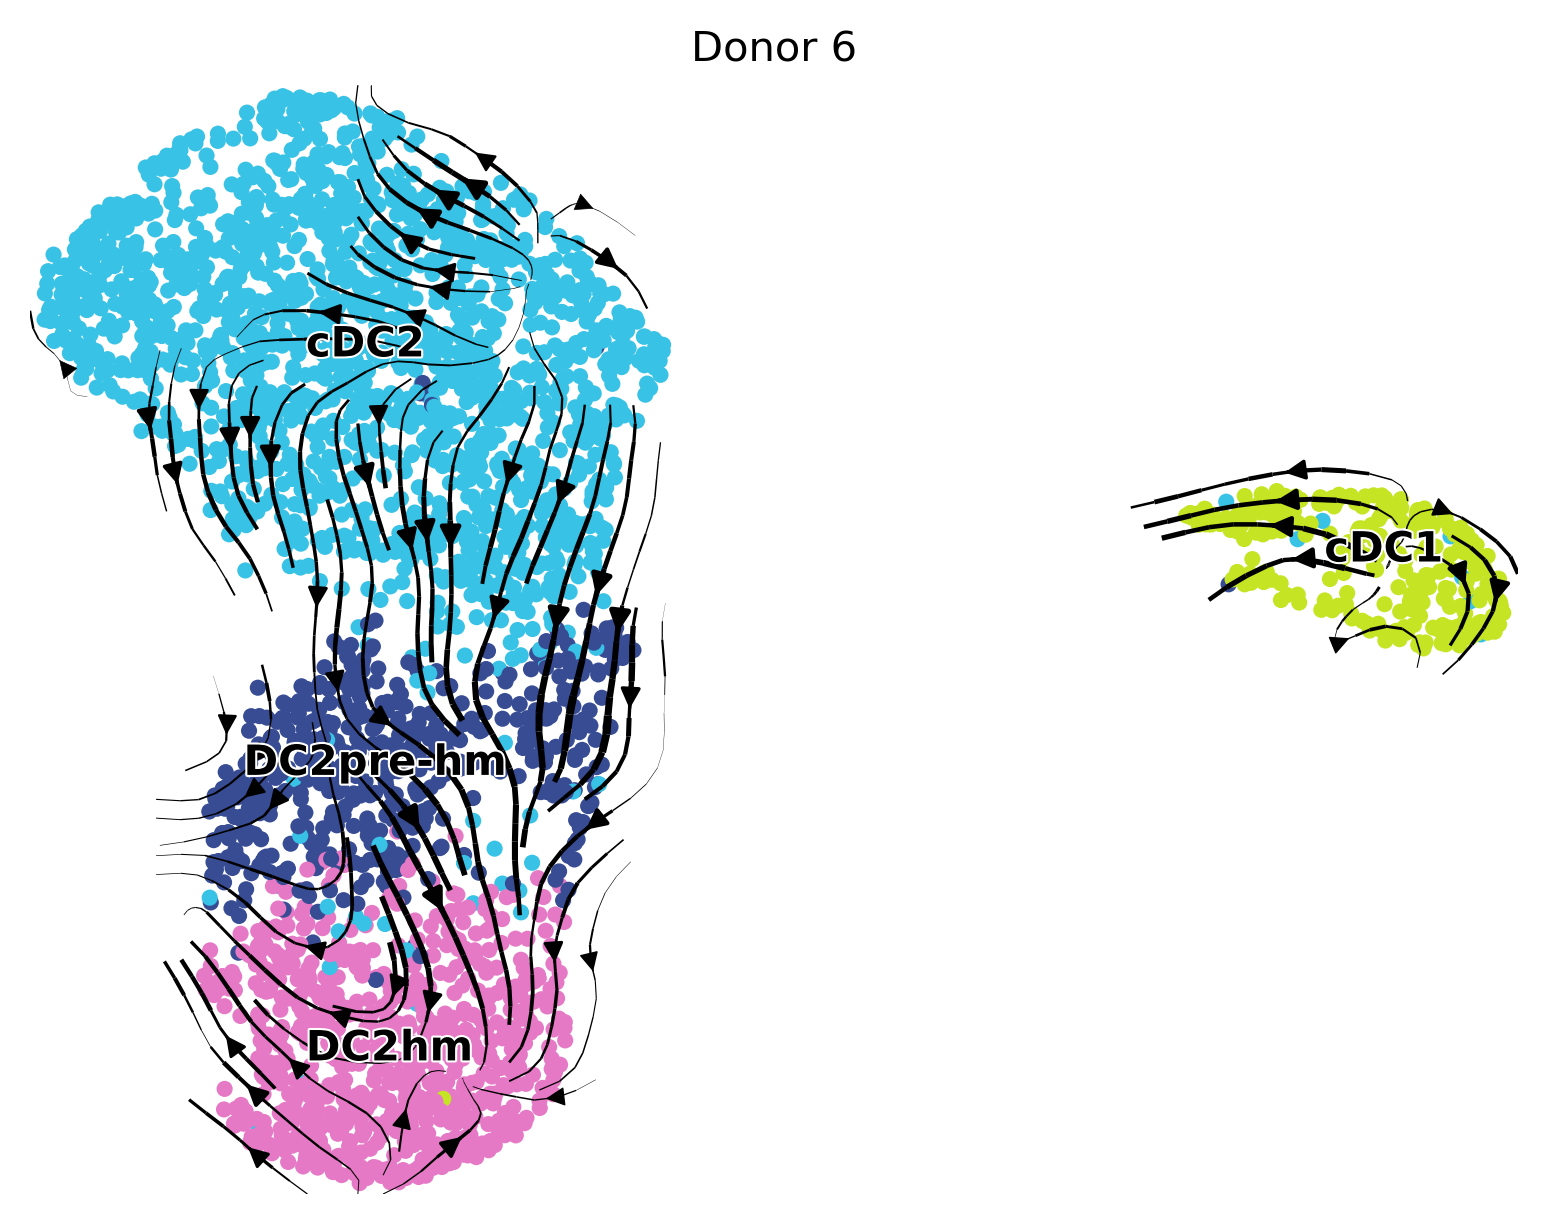

In [35]:
scv.pp.filter_and_normalize(d6_adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(d6_adata,n_pcs=30, n_neighbors=30)
scv.tl.recover_dynamics(d6_adata,n_jobs=10)
scv.tl.velocity(d6_adata,mode='dynamical')
scv.tl.velocity_graph(d6_adata, n_jobs=10)
# Figure S2J
scv.pl.velocity_embedding_stream(d6_adata, basis='umap', save='Outputs/figures/Dnr6_velocity_stream.svg',
                                 dpi=300, color='celltype_hh_1',palette=palette,
                                 title='Donor 6',size=60,alpha=1)

# Donor 6 all cDC2s

Read h5ad files

In [55]:
d6_cdc2s_adata = sc.read_h5ad('Outputs/h5ad/d6.object.cdc2s.h5ad')

Recover clustering info that was lost during the conversion

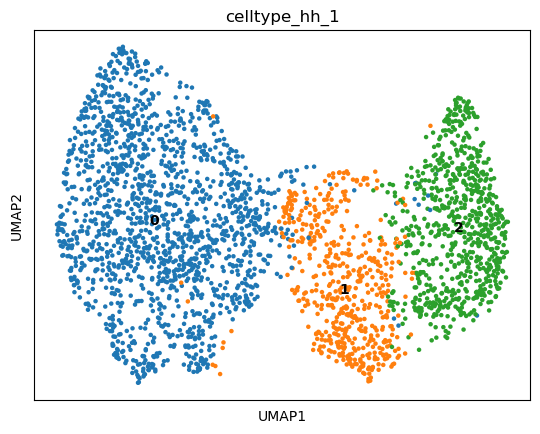

In [56]:
# Convert the cell identities from numeric into category
d6_cdc2s_adata.obs['celltype_hh_1'] = d6_cdc2s_adata.obs['celltype_hh_1'].astype('category')
sc.pl.umap(d6_cdc2s_adata, color='celltype_hh_1', legend_loc='on data')
# Rename numeric category into names
d6_cdc2s_adata.obs['celltype_hh_1'].cat.rename_categories({0:'cDC2',1:'DC2pre-hm',2:'DC2hm'},
inplace=True)

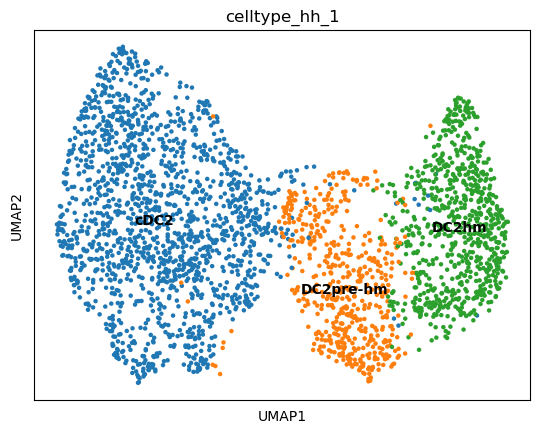

In [57]:
# Check the results
sc.pl.umap(d6_cdc2s_adata, color='celltype_hh_1', legend_loc='on data')

Computing and embedding velocities of all cDCs

Filtered out 16095 genes that are detected 10 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 6896 highly variable genes.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 10/20 cores)


  0%|          | 0/1910 [00:00<?, ?gene/s]

    finished (0:02:02) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 10/20 cores)


  0%|          | 0/2875 [00:00<?, ?cells/s]

    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file Outputs/figures/Dnr6_velocity_cDC2s_stream.svg


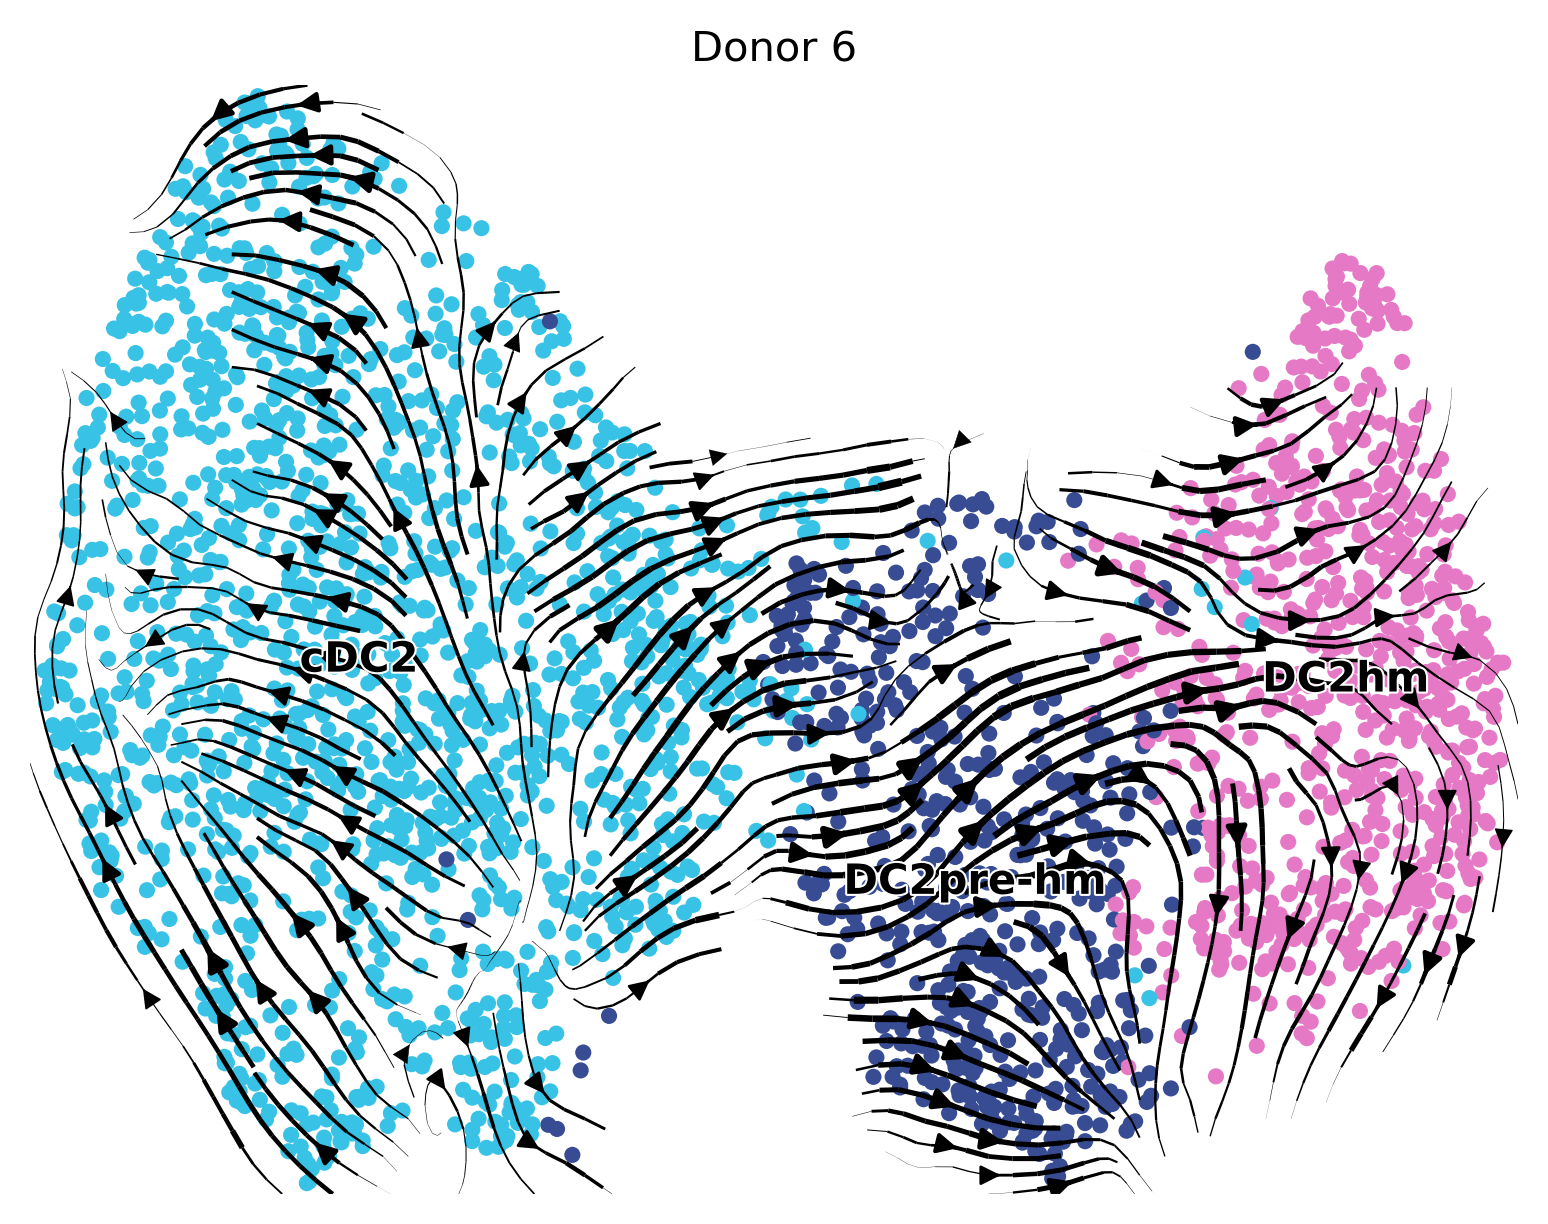

In [58]:
d6_cdc2s_adata = scv.utils.merge(d6_cdc2s_adata, d6_ldata)
scv.pp.filter_and_normalize(d6_cdc2s_adata, min_shared_counts=10, n_top_genes=2000,
                            enforce=True)
scv.pp.moments(d6_cdc2s_adata,n_pcs=30, n_neighbors=30)
scv.tl.recover_dynamics(d6_cdc2s_adata,n_jobs=10)
scv.tl.velocity(d6_cdc2s_adata,mode='dynamical')
scv.tl.velocity_graph(d6_cdc2s_adata, n_jobs=10)
# Figure 1H
scv.pl.velocity_embedding_stream(d6_cdc2s_adata, basis='umap',
                                 save='Outputs/figures/Dnr6_velocity_cDC2s_stream.svg',
                                 dpi=300, color='celltype_hh_1',palette=palette,
                                 title='Donor 6',size=60, alpha=1)

# Donor 10 all cDCs

Read h5ad files

In [59]:
d10_adata = sc.read_h5ad('Outputs/h5ad/d10.object.cdcs.h5ad')

Recover clustering info that was lost during the conversion

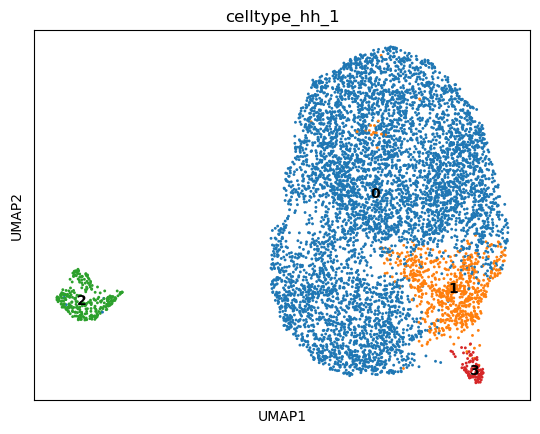

In [62]:
# Convert the cell identities from numeric into category
d10_adata.obs['celltype_hh_1'] = d10_adata.obs['celltype_hh_1'].astype('category')
sc.pl.umap(d10_adata, color='celltype_hh_1', legend_loc='on data')
# Rename numeric category into names
d10_adata.obs['celltype_hh_1'].cat.rename_categories({2:'cDC1',0:'cDC2',1:'DC2pre-hm',3:'DC2hm'},
                                                                                    inplace=True)

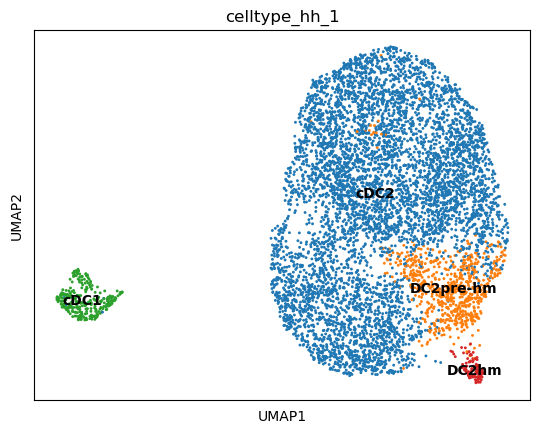

In [64]:
# Check the results
sc.pl.umap(d10_adata, color='celltype_hh_1', legend_loc='on data')

Computing and embedding velocities of all cDCs

In [67]:
# Read velocyto outputs and integrate into adata
d10_ldata = scv.read_loom('Velocyto_outputs/Dnr10.loom')
d10_adata = scv.utils.merge(d10_adata, d10_ldata)

Filtered out 1029 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 10/20 cores)


  0%|          | 0/599 [00:00<?, ?gene/s]

    finished (0:01:22) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 10/20 cores)


  0%|          | 0/7067 [00:00<?, ?cells/s]

    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file Outputs/figures/Dnr10_velocity_stream.svg


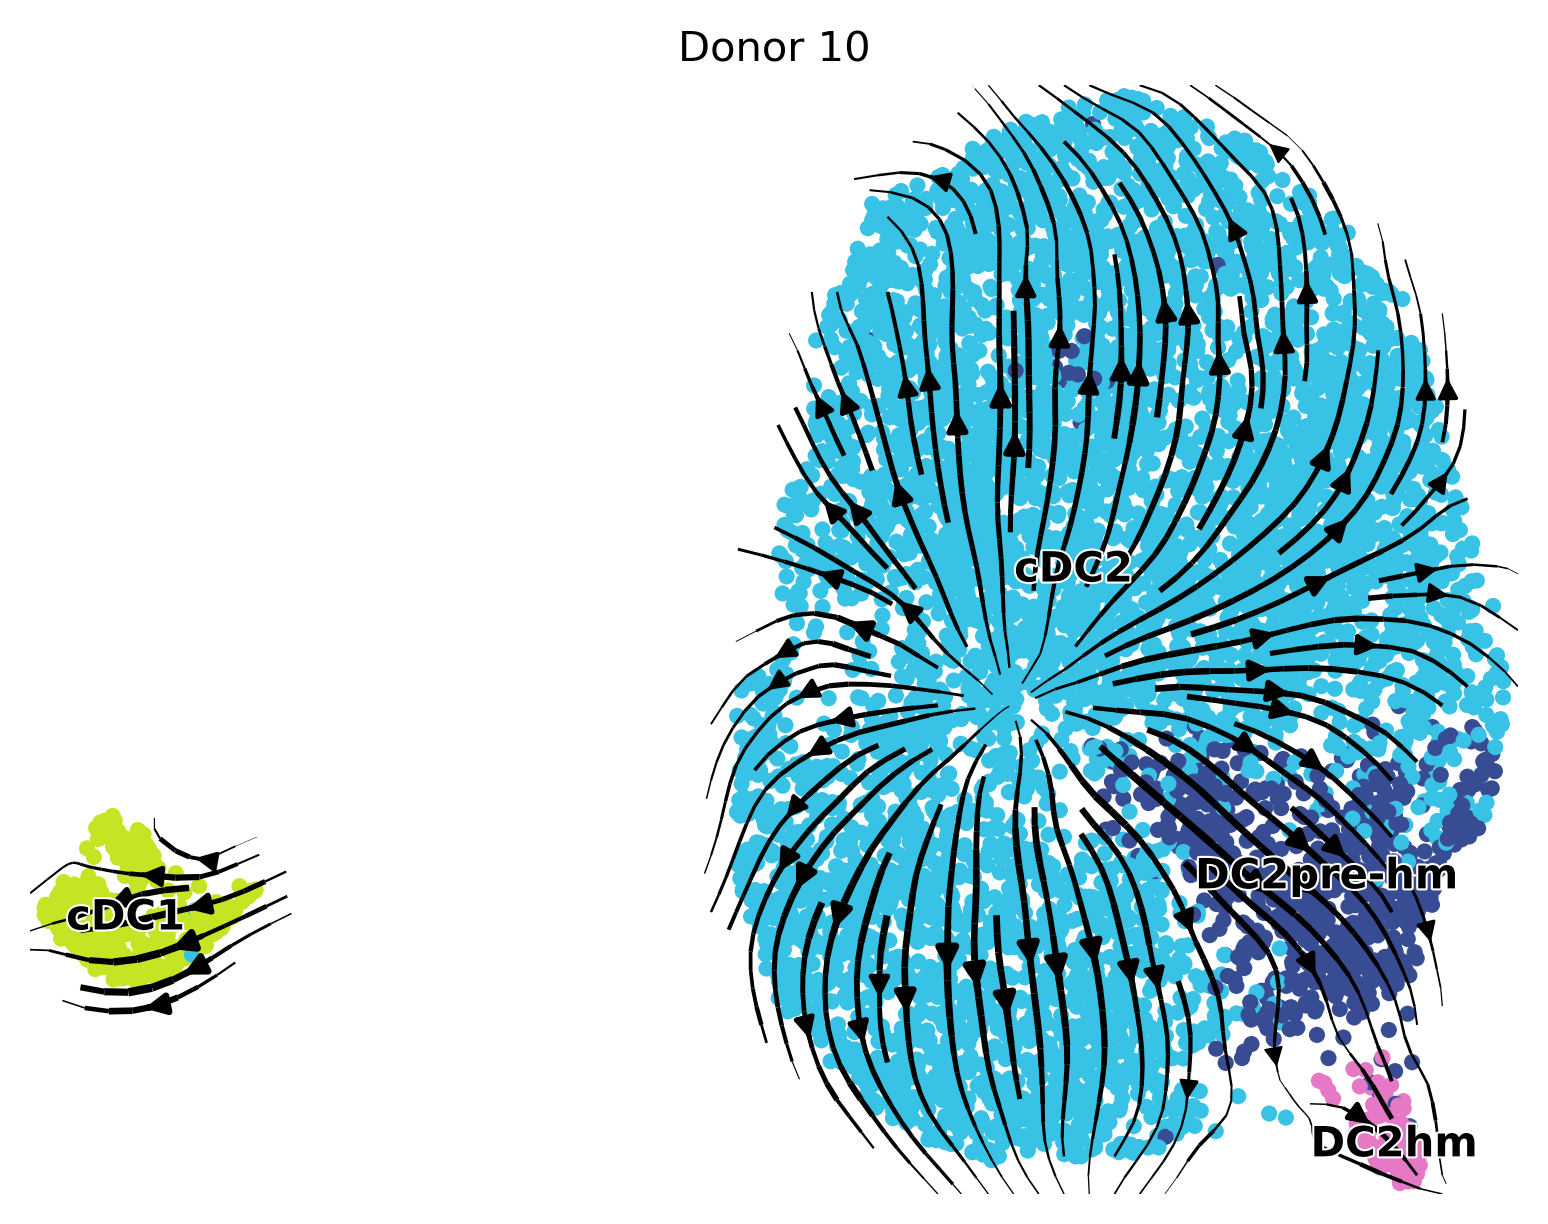

In [68]:
scv.pp.filter_and_normalize(d10_adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(d10_adata,n_pcs=30, n_neighbors=30)
scv.tl.recover_dynamics(d10_adata,n_jobs=10)
scv.tl.velocity(d10_adata,mode='stochastic')
scv.tl.velocity_graph(d10_adata, n_jobs=10)
# Figure S2J
scv.pl.velocity_embedding_stream(d10_adata, basis='umap', save='Outputs/figures/Dnr10_velocity_stream.svg',
                                 dpi=300, color='celltype_hh_1',palette=palette,
                                 title='Donor 10',size=60,alpha=1)

# Donor 12 all cDCs

Read h5ad files

In [73]:
d12_adata = sc.read_h5ad('Outputs/h5ad/d12.object.cdcs.h5ad')

Recover clustering info that was lost during the conversion

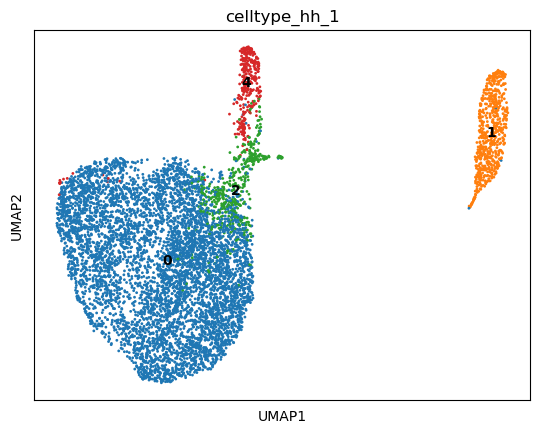

In [74]:
# Convert the cell identities from numeric into category
d12_adata.obs['celltype_hh_1'] = d12_adata.obs['celltype_hh_1'].astype('category')
sc.pl.umap(d12_adata, color='celltype_hh_1', legend_loc='on data')
# Rename numeric category into names
d12_adata.obs['celltype_hh_1'].cat.rename_categories({1:'cDC1',0:'cDC2',2:'DC2pre-hm',4:'DC2hm'},
                                                                                    inplace=True)

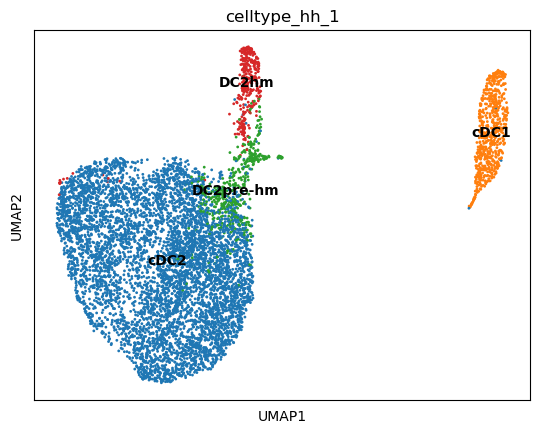

In [75]:
# Check the results
sc.pl.umap(d12_adata, color='celltype_hh_1', legend_loc='on data')

Computing and embedding velocities of all cDCs

In [76]:
# Read velocyto outputs and integrate into adata
d12_ldata = scv.read_loom('Velocyto_outputs/Dnr12.loom')
d12_adata = scv.utils.merge(d12_adata, d12_ldata)

Filtered out 16 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 10/20 cores)


  0%|          | 0/556 [00:00<?, ?gene/s]

    finished (0:01:16) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 10/20 cores)


  0%|          | 0/7504 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file Outputs/figures/Dnr12_velocity_stream.svg


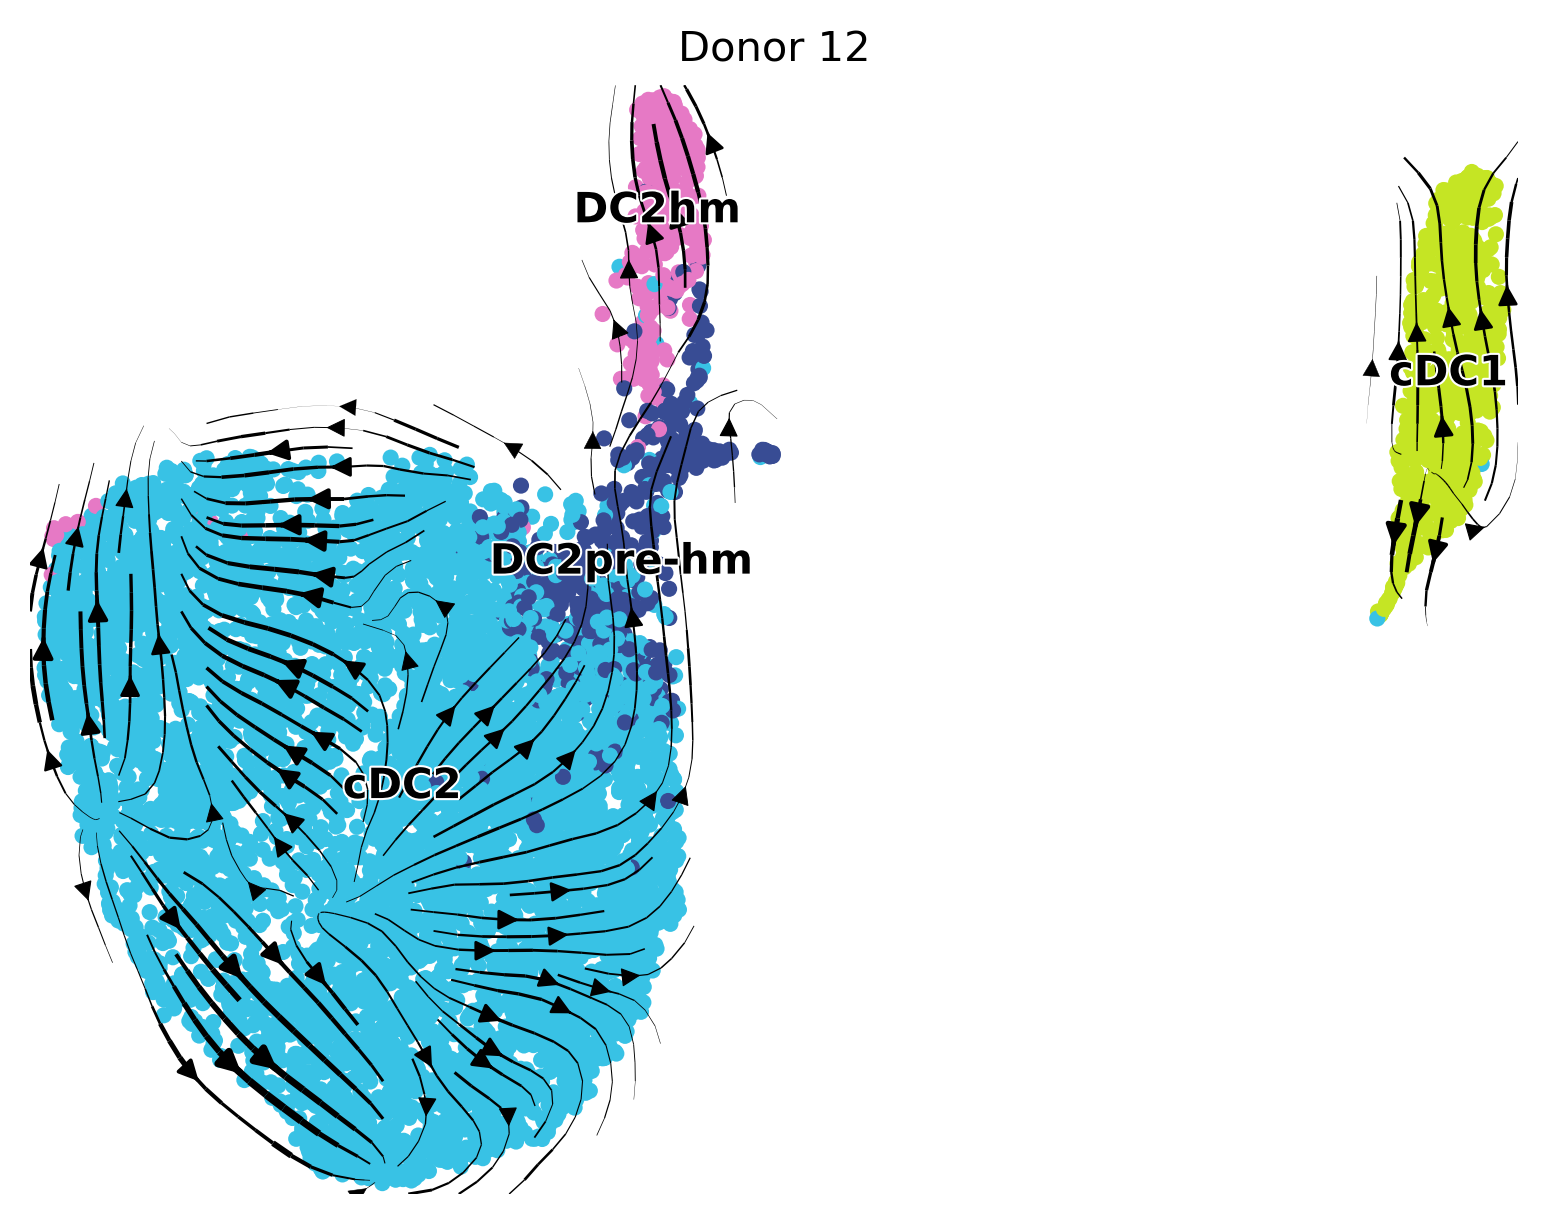

In [78]:
scv.pp.filter_and_normalize(d12_adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(d12_adata,n_pcs=30, n_neighbors=30)
scv.tl.recover_dynamics(d10_adata,n_jobs=10)
scv.tl.velocity(d12_adata,mode='stochastic')
scv.tl.velocity_graph(d12_adata, n_jobs=10,approx=True)
# Figure S2J
scv.pl.velocity_embedding_stream(d12_adata, basis='umap', save='Outputs/figures/Dnr12_velocity_stream.svg',
                                 dpi=300, color='celltype_hh_1',palette=palette,
                                 title='Donor 12',size=60,alpha=1)

# Save objects with velocities into h5ad files

In [79]:
d6_adata.write_h5ad('Outputs/h5ad/d6.object.cdcs.velocities.h5ad')
d6_cdc2s_adata.write_h5ad('Outputs/h5ad/d6.object.cdc2s.velocities.h5ad')
d10_adata.write_h5ad('Outputs/h5ad/d10.object.cdcs.velocities.h5ad')
d12_adata.write_h5ad('Outputs/h5ad/d12.object.cdcs.velocities.h5ad')